# ***PRÉDICTION DU PRIX DES VOITURES PAR RÉGRESSION LINÉAIRE***

***Etapes du projet***

1.importer les bibliothèques

2.charger et inspecter le jeu de données

3.nettoyage des données (supprimer/transformer des colonnes)

4.vérification de cohérence (valeurs manquantes, doublons, valeurs incohérentes)

5.analyse exploratoire des données (statistiques descriptives, visualisations)

6.Feature engineering (encodage des variables catégoriques)

7.détection des valeurs aberrantes (optionnel)

8.préparation du modèle (division des données, normalisation, encodage)

9.entraînement du modèle (ajustement d'une régression linéaire)

10.évaluation du modèle (R-carré, MAE, MSE)


***importer les bibliothèques***

In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import root_mean_squared_error, r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
warnings.filterwarnings('ignore')


***charger et inspecter le jeu de données***

In [4]:
df=pd.read_csv("CarPrice_Assignment.csv")
data=df.copy()


NameError: name 'pd' is not defined

In [522]:
# Aperçu des premieres lignes du dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [523]:
# Aperçu des dernieres lignes du dataset
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [524]:
# affichage de toutes les colonnes du dataset 
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [525]:
#Verification de la dimension du dataset
print("Shape of dataset:", df.shape)


Shape of dataset: (205, 26)


### ***Nettoyage des données***

In [526]:
#Supprimer les variables qualitatives non selectionnées
df.drop(['car_ID','fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],axis=1,inplace=True)

In [527]:
# Faire des modifications sur les valeurs de la variables qualitatives "CompanyName"

CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,symboling,carbody,CompanyName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,convertible,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,convertible,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,hatchback,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,sedan,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,sedan,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [528]:
#Identification des valeurs manquantes dans les variables qualitatives
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("****"*10)

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
****************************************
CompanyName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
porcshce        1
Nissan          1
toyouta         1
vokswagen       1
Name: count, dtype: int64
****************************************


##### Fixer les valeurs invalides
- Il semble y avoir une erreur d'orthographe dans la colonne CompanyName

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [529]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [530]:
df.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [531]:
data2=df.copy()

### ***Vérification de cohérence des données***

In [532]:
#verification des dimensions du dataset avec les variables selectionnées
print("Shape of the new dataset:", df.shape)


Shape of the new dataset: (205, 17)


In [533]:
#Informations sur les données
df.info()  # Vérifier les types de colonnes, les valeurs nulles et l'utilisation de la mémoire


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carbody           205 non-null    object 
 2   CompanyName       205 non-null    object 
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   curbweight        205 non-null    int64  
 8   enginesize        205 non-null    int64  
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
dt

In [534]:
# Valeurs manquantes et dupliquées
print("Missing values in each column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing values in each column:
 symboling           0
carbody             0
CompanyName         0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Duplicate rows: 0


In [535]:
#Valeurs incohérentes : identifier les valeurs invalides dans les colonnes de type object
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("****"*10)

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
****************************************
CompanyName
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
subaru        12
volkswagen    12
volvo         11
peugeot       11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
alfa-romeo     3
chevrolet      3
jaguar         3
renault        2
mercury        1
Name: count, dtype: int64
****************************************


### ***Prétraitement des données***

In [536]:
# DataFrame pour les colonnes catégorielles
categorical_columns = df.select_dtypes(include=["object"])
df_categorical = df[categorical_columns.columns]

# DataFrame pour les colonnes numériques
numeric_columns = df.select_dtypes(include=["number"])
df_numeric = df[numeric_columns.columns]

# Afficher les résultats
print("DataFrame des colonnes catégorielles:")
print(df_categorical)
print("\nDataFrame des colonnes numériques:")
print(df_numeric)


DataFrame des colonnes catégorielles:
         carbody CompanyName
0    convertible  alfa-romeo
1    convertible  alfa-romeo
2      hatchback  alfa-romeo
3          sedan        audi
4          sedan        audi
..           ...         ...
200        sedan       volvo
201        sedan       volvo
202        sedan       volvo
203        sedan       volvo
204        sedan       volvo

[205 rows x 2 columns]

DataFrame des colonnes numériques:
     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      6

In [537]:
# Save the cleaned dataframe as a CSV
df.to_csv('df_cleaned.csv', index=False)


In [538]:
#Resumé statistiques 
df_numeric.describe().T


,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


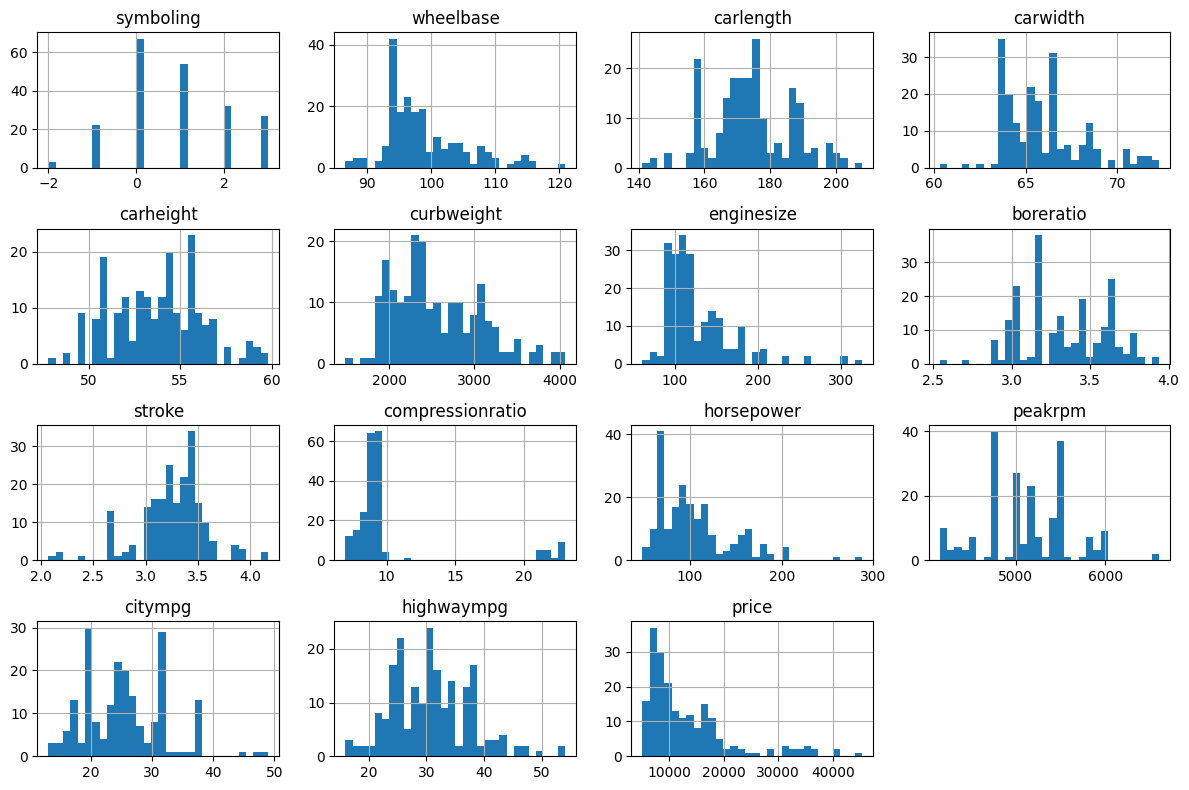

In [539]:
#Visualisation des distribution des variables quantitatives
df_numeric.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


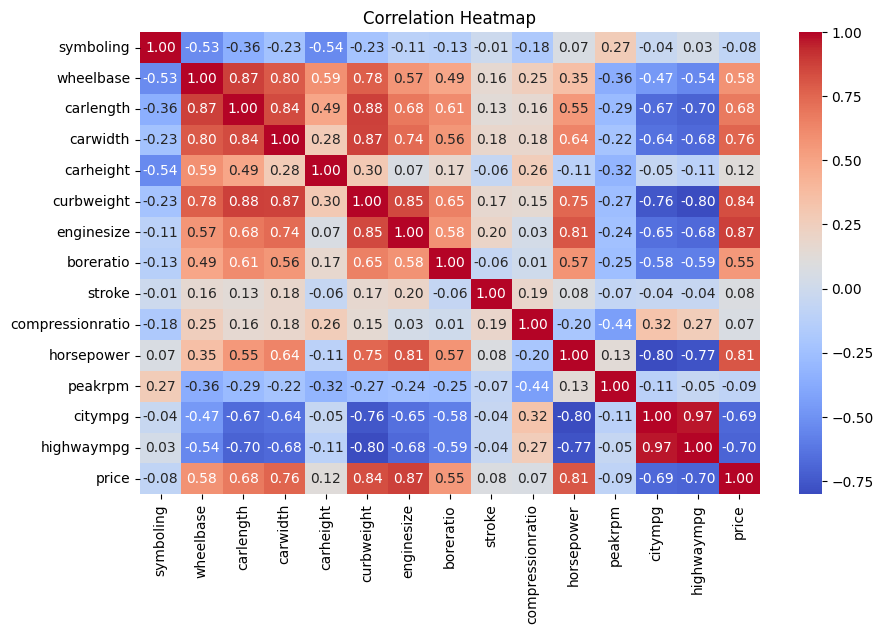

In [540]:
#Graphe de Correlation: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


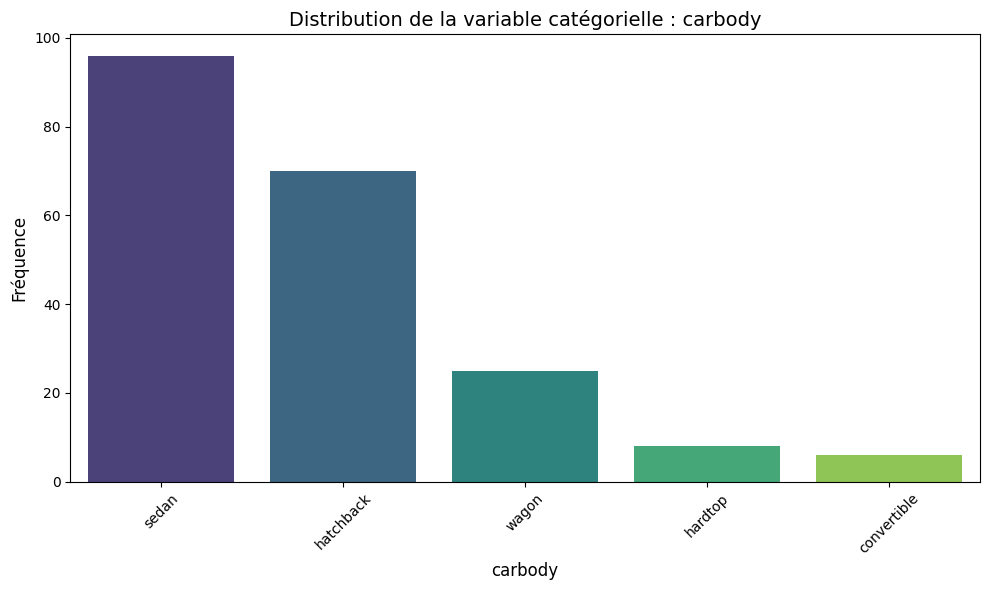

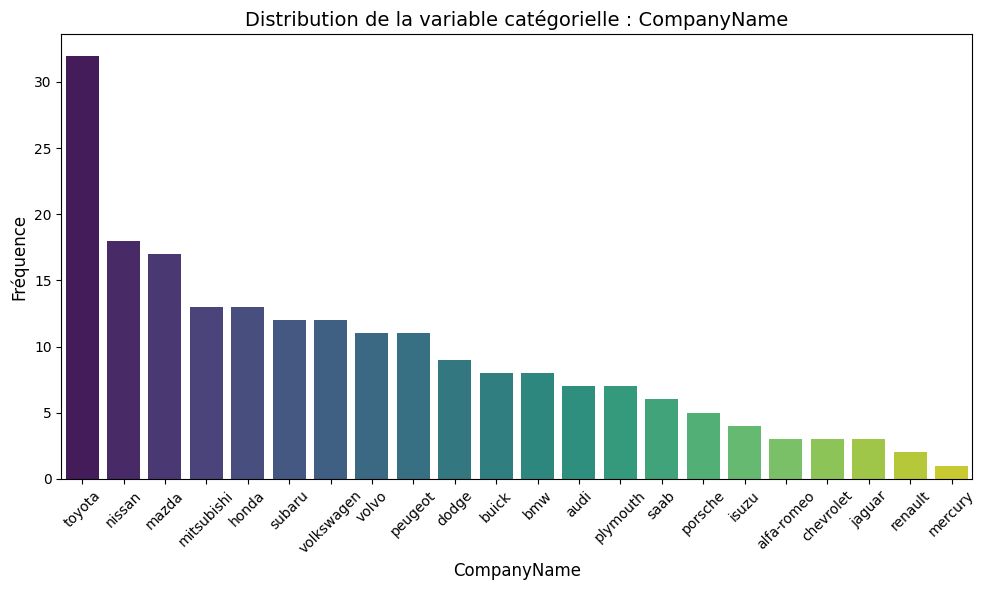

In [541]:
#Visualiser la distribution des variables qualitatives
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette="viridis")
    plt.title(f"Distribution de la variable catégorielle : {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Fréquence", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### ***Détection des Outliers***

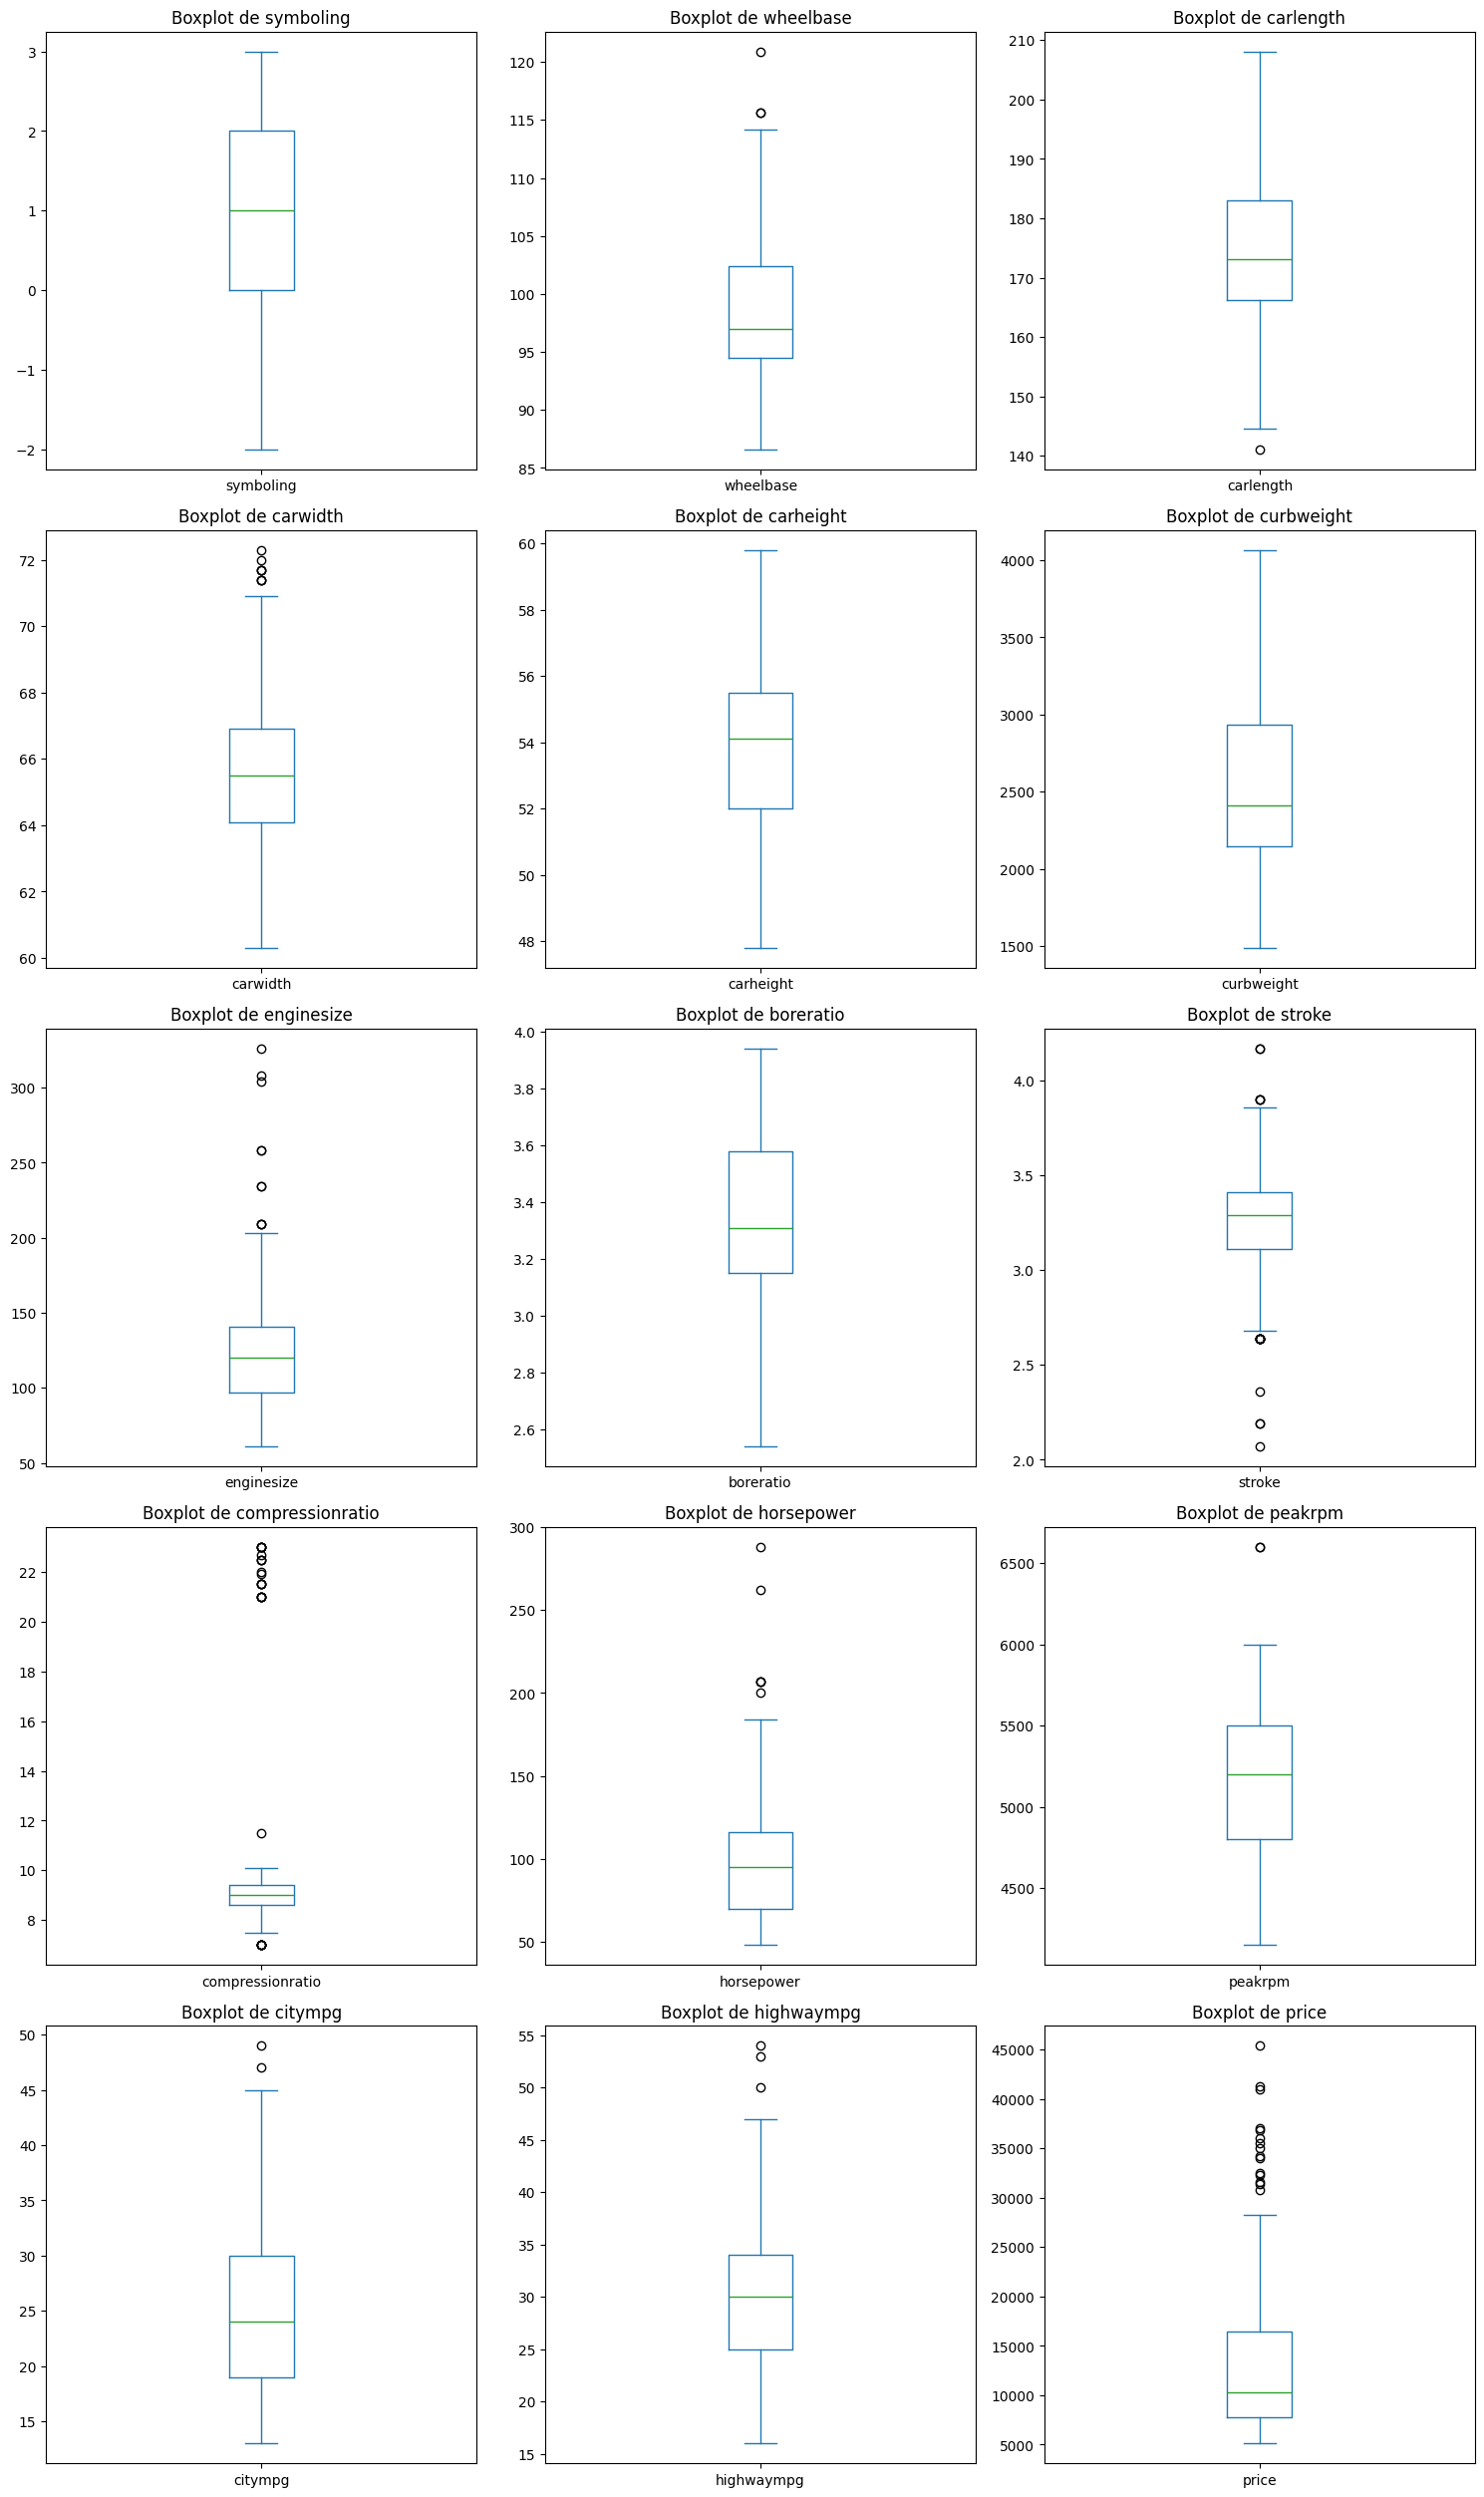

In [542]:

# Définir la taille de la grille en fonction du nombre de colonnes numériques
num_cols = len(numeric_columns)
cols = 3  # Nombre de colonnes de sous-graphiques (modifiable)
rows = (num_cols + cols - 1) // cols  # Calcul du nombre de lignes nécessaires

# Définir la figure globale
plt.figure(figsize=(cols * 5, rows * 5))

# Boucle sur chaque colonne numérique pour tracer un boxplot
for i, feature in enumerate(numeric_columns, 1):  # `enumerate` commence à 1
    plt.subplot(rows, cols, i)
    df[feature].plot(kind='box')
    plt.title(f'Boxplot de {feature}')
    plt.tight_layout()  # Ajuste automatiquement la disposition

# Afficher tous les graphiques
plt.show()


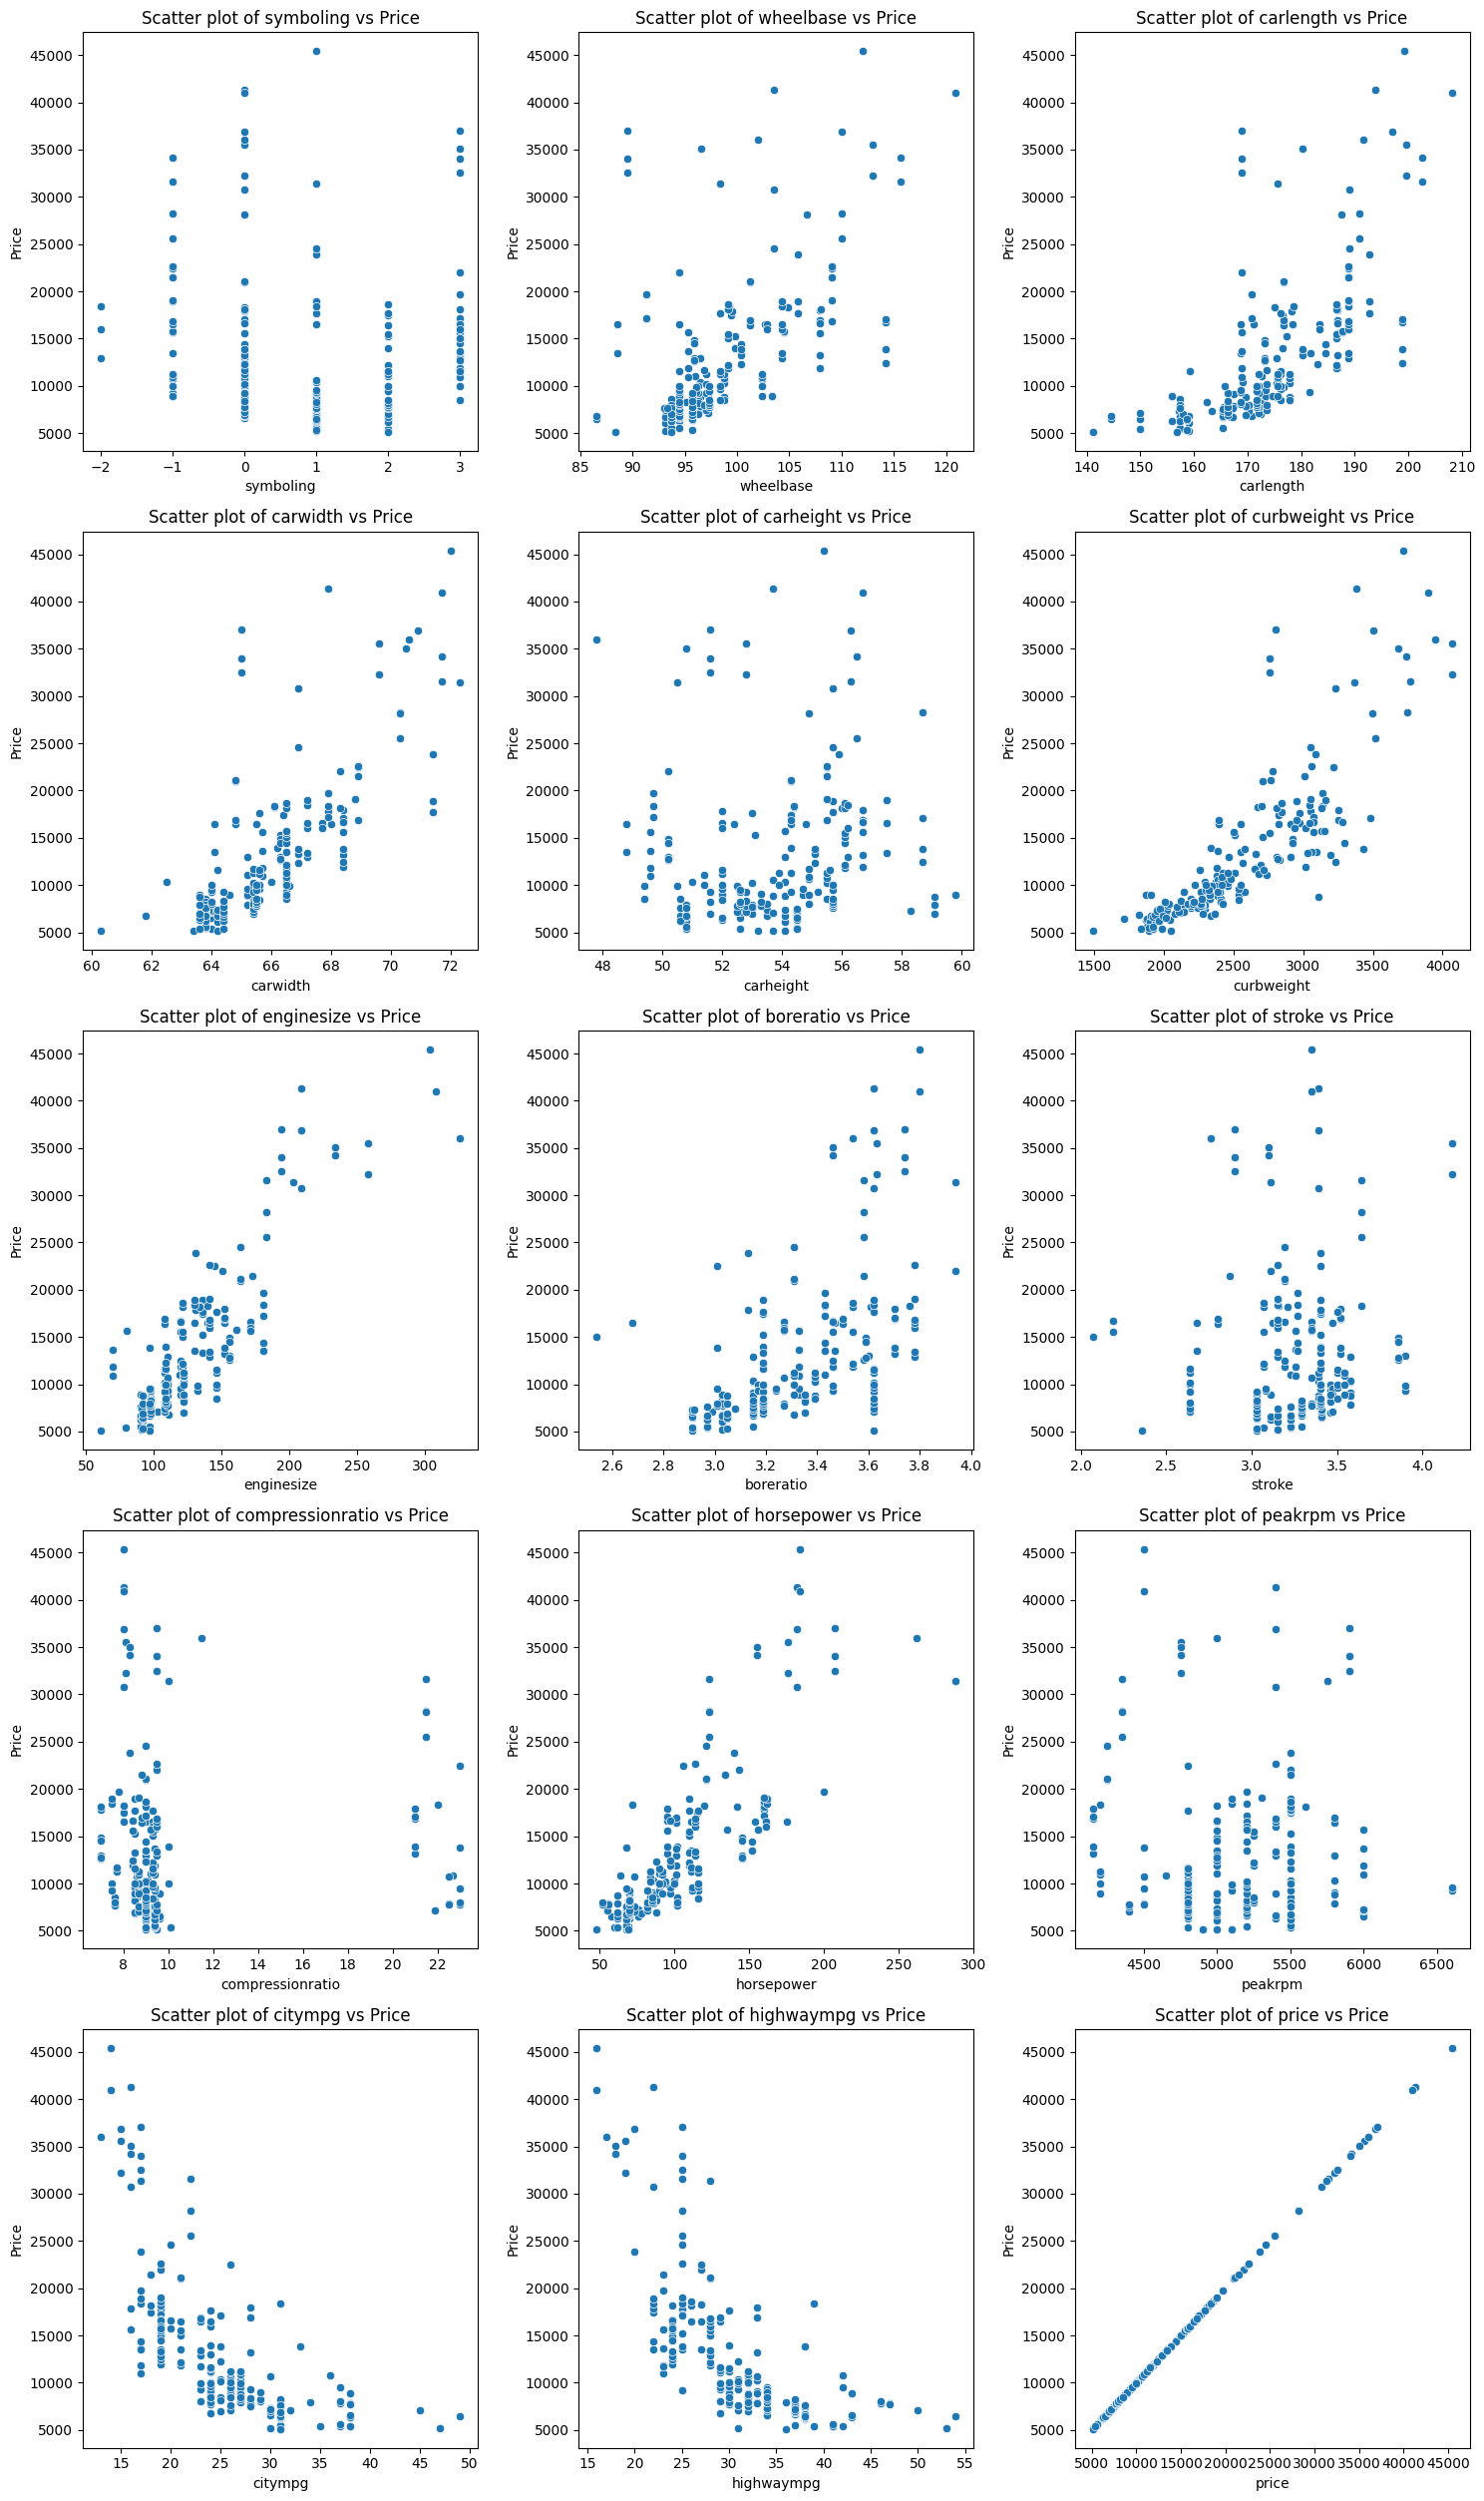

In [543]:

#  Définir la taille de la grille en fonction du nombre de colonnes numériques
num_cols = len(numeric_columns)
cols = 3  # Nombre de colonnes de sous-graphiques (modifiable)
rows = (num_cols + cols - 1) // cols  # Calcul du nombre de lignes nécessaires

# Définir la figure globale
plt.figure(figsize=(cols * 5, rows * 5))

# Parcourir les caractéristiques numériques et tracer chacune d'elles
for i, feature in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Scatter plot of {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


Les scatter plots pairwise offrent une vue d'ensemble rapide des relations dans les données numériques. Ils sont souvent utilisés dans l'exploration initiale des données pour détecter les relations, les anomalies et les tendances.

### ***Encodage des variables qualitatives***

 L'encodage fictif transforme ces variables catégorielles en un format compréhensible par les algorithmes, en les convertissant en colonnes binaires (0 ou 1), où chaque catégorie est représentée par une colonne distincte.

In [544]:
#Voir les valeurs de chaque variable
print(df_categorical['carbody'].unique())
print(df_categorical['CompanyName'].unique())


['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [545]:
# Définir la fonction pour créer des variables fictives
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df


categorical_columns = ['carbody', 'CompanyName']

# Appliquer la fonction d'encodage  à toutes les colonnes catégorielles
df_encoded = df_categorical.copy()
for col in categorical_columns:
    df_encoded = dummies(col, df_encoded)


In [546]:
#Aperçu sur les premieres lignes
df_encoded.head(20)

,hardtop,hatchback,sedan,wagon,audi,bmw,buick,chevrolet,dodge,honda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [547]:
##Informations sur les données
df_encoded.info() # Vérifier les types de colonnes, les valeurs nulles et l'utilisation de la mémoire


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hardtop     205 non-null    bool 
 1   hatchback   205 non-null    bool 
 2   sedan       205 non-null    bool 
 3   wagon       205 non-null    bool 
 4   audi        205 non-null    bool 
 5   bmw         205 non-null    bool 
 6   buick       205 non-null    bool 
 7   chevrolet   205 non-null    bool 
 8   dodge       205 non-null    bool 
 9   honda       205 non-null    bool 
 10  isuzu       205 non-null    bool 
 11  jaguar      205 non-null    bool 
 12  mazda       205 non-null    bool 
 13  mercury     205 non-null    bool 
 14  mitsubishi  205 non-null    bool 
 15  nissan      205 non-null    bool 
 16  peugeot     205 non-null    bool 
 17  plymouth    205 non-null    bool 
 18  porsche     205 non-null    bool 
 19  renault     205 non-null    bool 
 20  saab        205 non-null    bool

In [548]:
df_encoded.shape

(205, 25)

In [549]:
df_encoded.columns


Index(['hardtop', 'hatchback', 'sedan', 'wagon', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

## ***Préparation et Estimation  des  modèles***

### ***Normalisation des données***

In [550]:
# Initialisation du scaler
scaler = MinMaxScaler()

# Appliquer la normalisation
df_scaled = scaler.fit_transform(df_numeric)

# Convertir les données normalisées en DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Afficher les données normalisées
df_scaled


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


### ***Preparation du premier model***

In [551]:
# Variables indépendantes (X) et dépendante (y)
X = df_scaled.drop(columns=['price'])  # Exclure la variable cible
y = df_scaled['price']
# Ajouter la constante (intercept) au modèle
X = sm.add_constant(X)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire et entraîner le modèle
model1 = sm.OLS(y_train, X_train).fit()

# Résumé du modèle
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     64.23
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           9.55e-56
Time:                        16:20:31   Log-Likelihood:                 198.16
No. Observations:                 164   AIC:                            -366.3
Df Residuals:                     149   BIC:                            -319.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0656      0.083  

In [554]:
#prediction en utilisant le premier model
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1= np.sqrt(mse)
r2 = r2_score(y_test, y_pred1)

print(f"Performance après réduction des variables :")
print(f"Mean Squared Error (MSE): {mse1:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse1:.5f}")
print(f"R-squared (R²): {r2:.5f}")

Performance après réduction des variables :
Mean Squared Error (MSE): 0.00885
Root Mean Squared Error (RMSE): 0.08196
R-squared (R²): 0.81812


***Tests sur les residus***

***test de normalité***

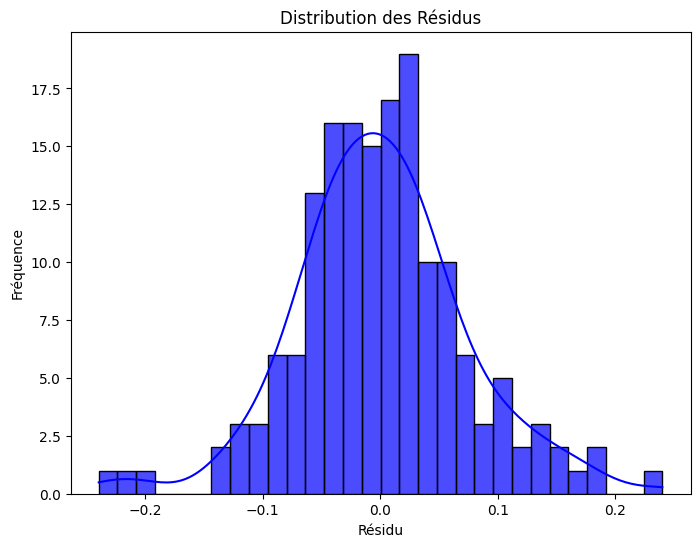

In [555]:
#Distribution des residus
residuals = model1.resid
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue", alpha=0.7)
plt.title("Distribution des Résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()



***Interpretation du graphe  :***

Une légère dispersion des points autour de la ligne indique que certaines prédictions ne sont pas exactes, mais cela reste raisonnable compte tenu du faible RMSE (0.09).
Outliers :

Certains points plus éloignés de la ligne pourraient être considérés comme des outliers (erreurs importantes). Cela pourrait mériter une analyse plus approfondie.

#### test de Shapiro-Wilk

In [556]:
from scipy.stats import shapiro
# Test de Shapiro-Wilk
stat, p_value = shapiro(residuals)
print(f"Statistique de Shapiro-Wilk : {stat}, p-valeur : {p_value}")

Statistique de Shapiro-Wilk : 0.9812532597907855, p-valeur : 0.02553086002180158


 ***Interpretation des resultats:***

 l'hypothèse de normalité des résidus n'est pas vérifiée, car la p-valeur du test de Shapiro-Wilk (0.00388) est inférieure au seuil habituel de 0.05. Cela indique que les résidus ne suivent pas une distribution normale.

***test d'homoscédasticité***


In [557]:
test_statistic, p_value, _, _ = het_breuschpagan(residuals, model1.model.exog)

# Afficher les résultats
print(f"Test statistique: {test_statistic}")
print(f"P-value: {p_value}")

Test statistique: 86.75882393250929
P-value: 1.5481942564199355e-12


***Interpretation des resultats:***

P-value très faible (1.55e-12) : Une p-value aussi faible indique que vous pouvez rejeter l'hypothèse nulle d'homoscédasticité (variance constante des erreurs). Cela signifie que les résidus de votre modèle sont hétéroscédastiques, c'est-à-dire qu'ils n'ont pas une variance constante à travers les différentes valeurs de la variable indépendante.

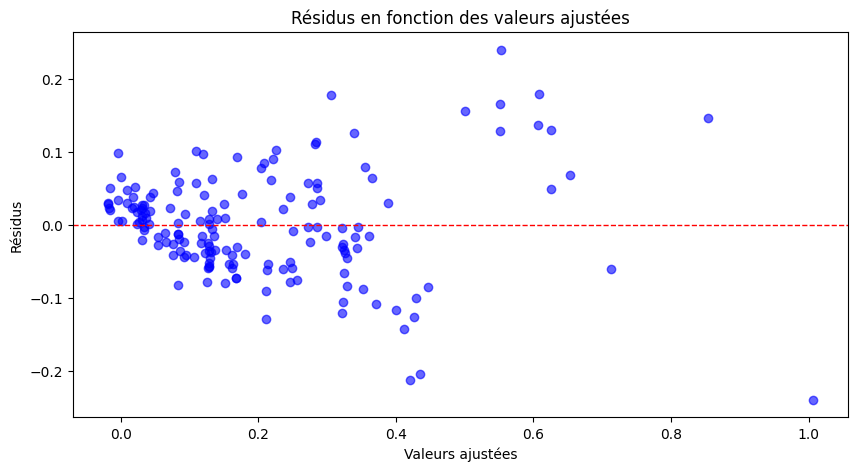

In [558]:
# Graphique des résidus en fonction des valeurs ajustées
fitted_values=model1.fittedvalues
plt.figure(figsize=(10, 5))
plt.scatter(fitted_values, residuals, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus en fonction des valeurs ajustées")
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.show()

***Interpretation du graphe :***
 Le graphique suggère que notre modèle présente de l'hétéroscédasticité, car la dispersion des résidus semble augmenter pour les valeurs ajustées plus grandes. Cela signifie que la variance des erreurs n'est pas constante, ce qui peut affecter la précision de nos estimations.

***CONCLUSION :***

Dans notre cas,la suppression des outliers est essentielle pour améliorer la précision et la robustesse du modèle, car ils peuvent biaiser les coefficients, fausser les hypothèses (normalité, homoscédasticité) et réduire la qualité des prédictions.

Pour résoudre ce probleme on va:

1- supprimer les variables non significatifs

2-supprimer les outliers


In [ ]:
# Identifer les variables significatives (valeurs p < 0.05)
significant_vars = model1.pvalues[model1.pvalues < 0.05].index
print(f"Variables significatives : {list(significant_vars)}")

In [ ]:
#Suppression des variables non significatives
df2=df_scaled.drop(['symboling', 'wheelbase', 'carlength', 'carheight', 'curbweight', 'boreratio', 'horsepower', 'highwaympg'],axis=1)

***Détection  des outliers influencant performance du modele***



In [559]:
#Détection des outliers avec les valeurs de Cook
influence = model1.get_influence()
cooks_d = influence.cooks_distance[0]
outliers = np.where(cooks_d > 1)[0]  # Les indices des outliers
print(f"Indices des outliers : {outliers}")


Indices des outliers : []


***Interpretation des resultats:***

les resultats montrent qu'aucune valeurs abberantes n'influence la performance du modele

***Preparation du deuxieme model (sans variables non significatifs & sans intercept)***

In [560]:
X_train = X_train[significant_vars]
X_test = X_test[significant_vars]

In [561]:
# Construire et entraîner le modèle
model2 = sm.OLS(y_train, X_train).fit()

# Résumé du modèle
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              345.5
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                    4.05e-88
Time:                        16:20:31   Log-Likelihood:                          194.39
No. Observations:                 164   AIC:                                     -376.8
Df Residuals:                     158   BIC:                                     -358.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

***Interpretation des résultats :***

Le modèle OLS semble être globalement performant avec un R² élevé et des variables significatives. Toutefois, les tests de normalité (Omnibus et Jarque-Bera) suggèrent que les résidus ne suivent pas une distribution normale, ce qui pourrait nécessiter des ajustements dans le modèle.

***Tests sur les residus***

***Test de normalité***

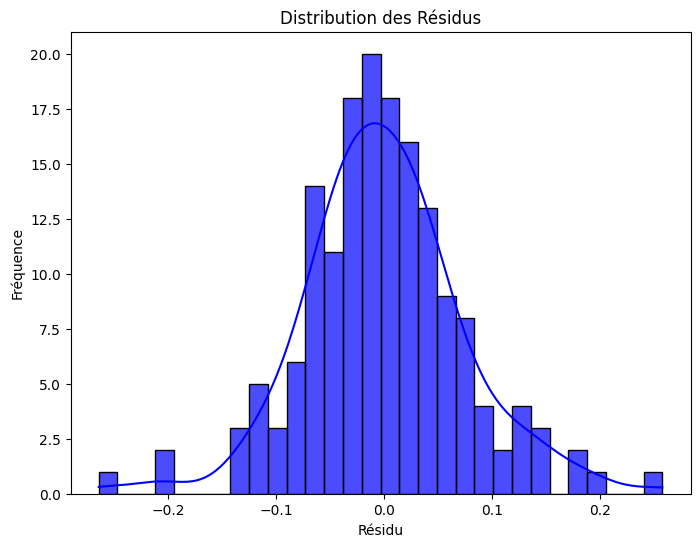

In [562]:
#Distribution des residus
residuals = model2.resid
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue", alpha=0.7)
plt.title("Distribution des Résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()



***Test de l'homoscedasticité***

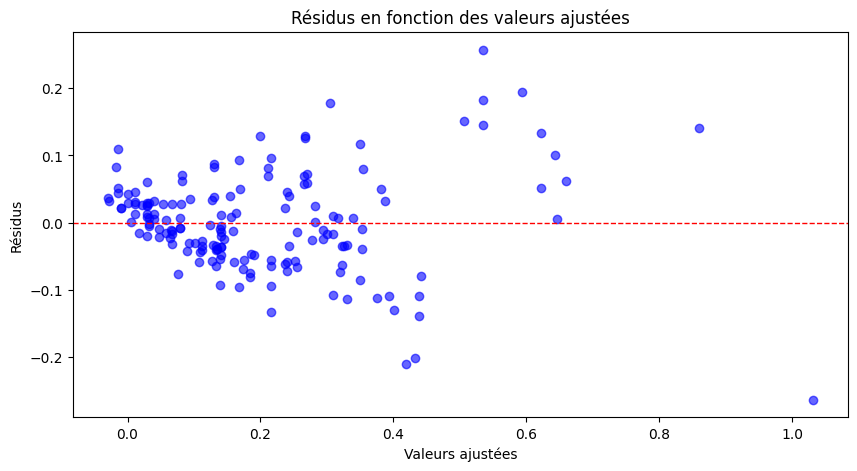

In [563]:
# Graphique des résidus en fonction des valeurs ajustées
fitted_values=model2.fittedvalues
plt.figure(figsize=(10, 5))
plt.scatter(fitted_values, residuals, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus en fonction des valeurs ajustées")
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.show()

In [564]:
y_pred2=model2.predict(X_test)
rmse2 = root_mean_squared_error(y_test, y_pred2)
print(f"Root Mean Squared Error (RMSE): {rmse2}")

Root Mean Squared Error (RMSE): 0.09860471219012432


***CONCLUSION :***

La meilleure technique pour résoudre l'hétéroscédasticité est la transformation logarithmique de la variable dépendante (y)

***Preparation du troisieme  Model avec la transforamtion boxcox  + intercept***

In [565]:
# Variables indépendantes (X) et dépendante (y)
X = df2.drop(columns=['price'])  # Exclure la variable cible
y = df2['price']
# Ajouter la constante (intercept) au modèle
X = sm.add_constant(X)
# Transformation Box-Cox si nécessaire
y_transformed, lambda_ = stats.boxcox(y+1)
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed, test_size=0.2, random_state=42)

In [566]:
# Transformation de la variable cible
#y_train_log = np.log(y_train + 1)
# Ajuster le modèle OLS avec transformation logarithmique
model3 = sm.OLS(y_train,X_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     149.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.34e-62
Time:                        16:20:32   Log-Likelihood:                 391.12
No. Observations:                 164   AIC:                            -768.2
Df Residuals:                     157   BIC:                            -746.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1106      0.014  

***Tests sur les residus***

***Test de normalité***

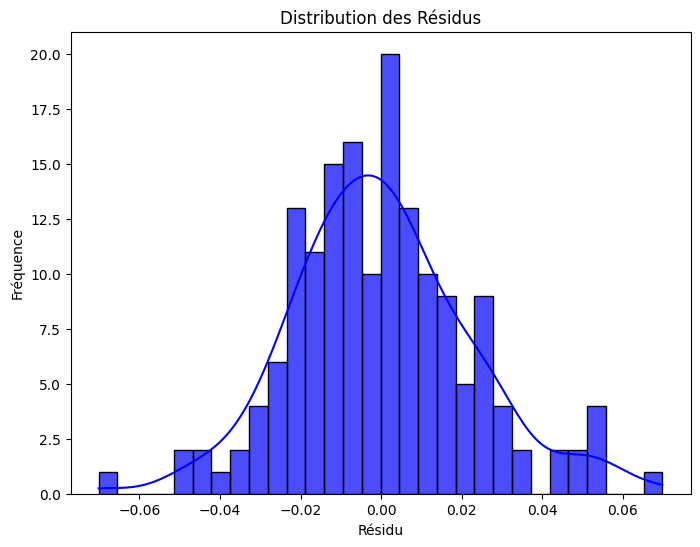

In [567]:
#Distribution des residus
residuals = model3.resid
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue", alpha=0.7)
plt.title("Distribution des Résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()



***Test de l'homoscedasticité***

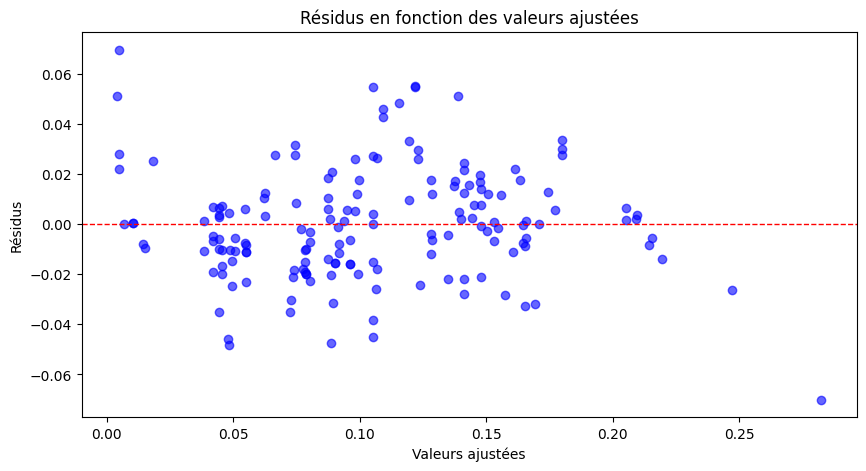

In [568]:
# Graphique des résidus en fonction des valeurs ajustées
fitted_values=model3.fittedvalues
plt.figure(figsize=(10, 5))
plt.scatter(fitted_values, residuals, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus en fonction des valeurs ajustées")
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.show()

In [569]:
exog_with_constant = sm.add_constant(model3.model.exog)

# Now, perform the Breusch-Pagan test
test_statistic, p_value, _, _ = het_breuschpagan(residuals, exog_with_constant)
# Afficher les résultats
print(f"Test statistique: {test_statistic}")
print(f"P-value: {p_value}")

Test statistique: 29.76148674945368
P-value: 4.363204397857646e-05


In [570]:
y_pred3=model3.predict(X_test)
rmse3 = root_mean_squared_error(y_test, y_pred3)
print(f"Root Mean Squared Error (RMSE): {rmse3}")

Root Mean Squared Error (RMSE): 0.02827077704809511


***METHODE ANOVA***

In [571]:
#affichage des variables qualitatives
df_categorical

,carbody,CompanyName
0,convertible,alfa-romeo
1,convertible,alfa-romeo
2,hatchback,alfa-romeo
3,sedan,audi
4,sedan,audi
...,...,...
200,sedan,volvo
201,sedan,volvo
202,sedan,volvo
203,sedan,volvo


In [572]:
# Conversion des facteurs en catégories
df_categorical['factor1'] = df_categorical['carbody'].astype('category')
df_categorical['factor2'] = df_categorical['CompanyName'].astype('category')
df_category=df_categorical.copy()
df_categorical['y']=df_scaled['price']

# 2. Réalisation du test ANOVA
# Modèle linéaire avec interaction entre les deux facteurs
model4 = ols('y ~ C(factor1) + C(factor2) + C(factor1):C(factor2)', data=df_categorical).fit()

# Résultats du test ANOVA
anova_results = anova_lm(model4)
print("Résultats du test ANOVA :")
print(anova_results)


Résultats du test ANOVA :
                          df    sum_sq   mean_sq          F        PR(>F)
C(factor1)               4.0  1.110534  0.277634  30.828686  1.072413e-18
C(factor2)              21.0  5.369417  0.255687  28.391665  1.047477e-41
C(factor1):C(factor2)   84.0  0.936408  0.011148   1.237852  1.289455e-01
Residual               149.0  1.341848  0.009006        NaN           NaN


***Interprétation des résultats***

##### 1. Effet principal de factor1
La statistique F = 30.83 est très élevée, et la p-valeur associée (p = 1.07 * 10^(-18)) est extrêmement faible (p < 0.05).  
**Conclusion :** factor1 a un effet significatif sur la variable dépendante Y. Cela signifie que les différents niveaux de factor1 influencent significativement la réponse.

##### 2. Effet principal de factor2
La statistique F = 28.39 est également élevée, avec une p-valeur extrêmement faible (p = 1.05 * 10^(-41)).  
**Conclusion :** factor2 a un effet significatif sur Y. Cela indique que les niveaux de factor2 affectent significativement la réponse.

##### 3. Interaction entre factor1 et factor2
La statistique F = 1.24 est faible, avec une p-valeur de p = 0.129, supérieure à 0.05.  

**Conclusion :** L'interaction entre factor1 et factor2 n'est pas significative. Cela signifie que l'effet de factor1 sur Y est indépendant des niveaux de factor2 (et vice versa).

In [573]:
df2.head()

,carwidth,enginesize,stroke,compressionratio,peakrpm,citympg,price
0,0.316667,0.260377,0.290476,0.1250,0.346939,0.222222,0.207959
1,0.316667,0.260377,0.290476,0.1250,0.346939,0.222222,0.282558
2,0.433333,0.343396,0.666667,0.1250,0.346939,0.166667,0.282558
3,0.491667,0.181132,0.633333,0.1875,0.551020,0.305556,0.219254
4,0.508333,0.283019,0.633333,0.0625,0.551020,0.138889,0.306142


In [574]:
# Conversion des colonnes booléennes en entiers
df_encoded=df_encoded.astype(int)
data_complete=pd.concat([df2,df_encoded], axis=1)

# Variables indépendantes (X) et dépendante (y)
X = data_complete.drop(columns=['price'])  # Exclure la variable cible
y = data_complete['price']
# Ajouter la constante (intercept) au modèle
X = sm.add_constant(X)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire et entraîner le modèle
model4 = sm.OLS(y_train, X_train).fit()

# Résumé du modèle
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     75.98
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           1.11e-69
Time:                        16:20:32   Log-Likelihood:                 278.95
No. Observations:                 164   AIC:                            -493.9
Df Residuals:                     132   BIC:                            -394.7
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0998      0.049  

***Tests sur les residus***

***test de normalité***

In [575]:
from scipy.stats import shapiro
# Test de Shapiro-Wilk
residuals=model4.resid
stat, p_value = shapiro(residuals)
print(f"Statistique de Shapiro-Wilk : {stat}, p-valeur : {p_value}")

Statistique de Shapiro-Wilk : 0.9860104260579573, p-valeur : 0.09952059401748005


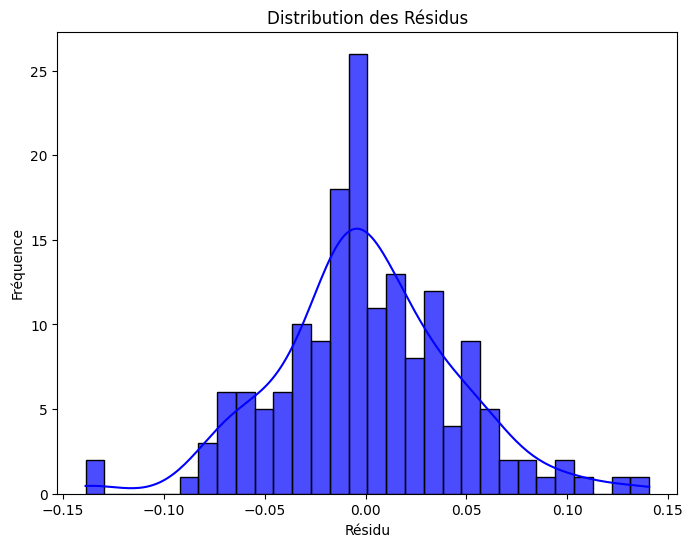

In [576]:
#Distribution des residus
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue", alpha=0.7)
plt.title("Distribution des Résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()

***Interpretation des resultats:***
D'après les resultats obtenues on constate que la normalité est verifiée

***test de l'homoscedasticité***

In [577]:

test_statistic, p_value, _, _ = het_breuschpagan(residuals, model4.model.exog)

# Afficher les résultats
print(f"Test statistique: {test_statistic}")
print(f"P-value: {p_value}")

Test statistique: 61.6556856468239
P-value: 0.0008574536057750111


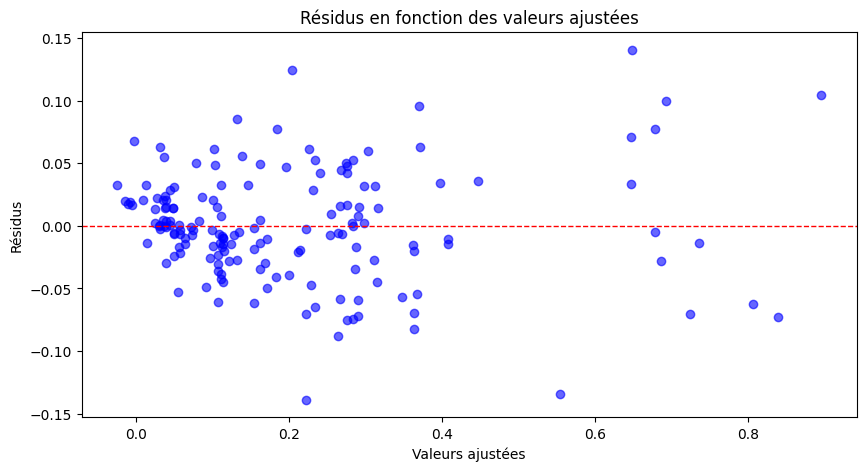

In [578]:
# Graphique des résidus en fonction des valeurs ajustées
fitted_values=model4.fittedvalues
plt.figure(figsize=(10, 5))
plt.scatter(fitted_values, residuals, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus en fonction des valeurs ajustées")
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.show()

***Interpretation des resultats:***
D'après les resultats obtenues on constate malheureusement que le test d'homoscedasticité est non verfié

In [579]:
#Prediction d modele
y_pred4=model4.predict(X_test)
rmse4 = root_mean_squared_error(y_test, y_pred4)
print(f"Root Mean Squared Error (RMSE): {rmse4}")

Root Mean Squared Error (RMSE): 0.08195956216908726


***Comparaison des modeles***

In [580]:
import pandas as pd

# Liste des modèles ajustés avec sm.OLS (assumes que model1, model2, model3 sont déjà ajustés)
models = [model1, model2, model3,model4]

# Liste des RMSE déjà calculés pour chaque modèle
rmse_list = [rmse1, rmse2, rmse3,rmse4]  # Remplace ces valeurs par les RMSE calculés pour chaque modèle

# Liste pour stocker les résultats
results = []

# Estimation des modèles et extraction des métriques
for i, model in enumerate(models):
    # Extraire R² et AIC
    r2 = model.rsquared
    aic = model.aic
    rmse = rmse_list[i]  # RMSE correspond à l'index du modèle
    
    # Sauvegarder les résultats dans une liste
    results.append([f'Modèle {i+1}', r2, aic, rmse])

# Convertir les résultats en DataFrame pour un affichage plus facile
results_df = pd.DataFrame(results, columns=['Modèle', 'R²', 'AIC', 'RMSE'])

# Afficher les résultats
print(results_df)

# Comparaison des modèles (par exemple, le meilleur selon chaque critère)
best_model_r2 = results_df.loc[results_df['R²'].idxmax()]
best_model_aic = results_df.loc[results_df['AIC'].idxmin()]
best_model_rmse = results_df.loc[results_df['RMSE'].idxmin()]

print("\nMeilleur modèle selon R²:")
print(best_model_r2)

print("\nMeilleur modèle selon AIC:")
print(best_model_aic)

print("\nMeilleur modèle selon RMSE:")
print(best_model_rmse)


     Modèle        R²         AIC      RMSE
0  Modèle 1  0.857852 -366.311141  0.081960
1  Modèle 2  0.929185 -376.782745  0.098605
2  Modèle 3  0.851404 -768.242644  0.028271
3  Modèle 4  0.946934 -493.906492  0.081960

Meilleur modèle selon R²:
Modèle      Modèle 4
R²          0.946934
AIC      -493.906492
RMSE         0.08196
Name: 3, dtype: object

Meilleur modèle selon AIC:
Modèle      Modèle 3
R²          0.851404
AIC      -768.242644
RMSE        0.028271
Name: 2, dtype: object

Meilleur modèle selon RMSE:
Modèle      Modèle 3
R²          0.851404
AIC      -768.242644
RMSE        0.028271
Name: 2, dtype: object
